<a href="https://colab.research.google.com/github/Alihassan7726/LSTM-Bi-LSTM/blob/main/Fake_news_calssification_using_Bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [3]:
import io
import pandas as pd
pd.set_option('max_colwidth', 1000)

myfile = open('/content/gdrive/MyDrive/Colab DataSets/fake_news_train.csv')
myfile
df_train = pd.read_csv(myfile , encoding = 'ISO-8859-1')
# Dataset is now stored in a Pandas Dataframe
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It,Darrell Lucus,"House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing e...",1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart",Daniel J. Flynn,"Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress. Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us — the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and ...",0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, 2016 \nThe tension between intelligence analysts and political policymakers has always been between honest assessments and desired results, with the latter often overwhelming the former, as in the Iraq War, writes Lawrence Davidson. \nBy Lawrence Davidson \nFor those who might wonder why foreign policy makers repeatedly make bad choices, some insight might be drawn from the following analysis. The action here plays out in the United States, but the lessons are probably universal. \nBack in the early spring of 2003, George W. Bush initiated the invasion of Iraq. One of his key public reasons for doing so was the claim that the country’s dictator, Saddam Hussein, was on the verge of developing nuclear weapons and was hiding other weapons of mass destruction. The real reason went beyond that charge and included a long-range plan for “regime change” in the Middle East. President George W. Bush and Vice President Dick Cheney receive an Oval ...",1
3,3,15 Civilians Killed In Single US Airstrike Have Been Identified,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilians are being killed by American airstrikes in Afghanistan is now higher than it was in 2014 when the US was engaged in active combat operations. Photo of Hellfire missiles being loaded onto a US military Reaper drone in Afghanistan by Staff Sgt. Brian Ferguson/U.S. Air Force. \nThe Bureau has been able to identify 15 civilians killed in a single US drone strike in Afghanistan last month – the biggest loss of civilian life in one strike since the attack on the Medecins Sans Frontieres hospital (MSF) last October. \nThe US claimed it had conduct

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
import numpy as np
df_train.dropna(axis = 0 , inplace = True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [6]:
labels_0 = df_train[df_train['label'] == int(0)].sample(5000)
print(labels_0.shape)

labels_1 = df_train[df_train['label'] == int(1)].sample(5000)
print(labels_1.shape)

new_df = pd.concat([labels_0 , labels_1] , ignore_index = True , axis = 0)
print(new_df.shape)
new_df = new_df.reset_index()
new_df.head()

(5000, 5)
(5000, 5)
(10000, 5)


,index,id,title,author,text,label
0,0,346,"FLASHBACK - Reports: Obama’s 2008 Campaign Reps Talked with Iran, Hamas",Aaron Klein,"Amid the controversy surrounding White House National Security Adviser Michael Flynn’s alleged conversations with Russia, it may be instrumental to recall that representatives for Barack Obama’s 2008 presidential campaign were accused of meeting with Hamas and Iran. [Depending on what took place, the alleged contacts with Iran may have violated the Logan Act, which bars citizens from negotiating with foreign governments in dispute with the United States. It may be questionable whether Hamas, which rules the Gaza Strip, legally qualifies as a foreign government. In 2008, Robert Malley stepped down as an informal foreign policy adviser to Obama’s campaign when it was revealed that he met with Hamas members. Malley admitted to the meetings, but he claimed he met with the terrorists as part of his private job. “I have never hidden the fact that I had meetings with Hamas,” Malley wrote in an open letter published in the New York Times. “I do this as part of my job as Middle East progra...",0
1,1,14060,A Biased Judge? Donald Trump Has Claimed It Before - The New York Times,Michael Barbaro and Megan Twohey,"The circumstances sound eerily familiar: Donald J. Trump and his legal team had suffered a setback in a major court case. So they leveled an attack on the presiding judge, calling him irredeemably biased and unfair. “Your Honor,” wrote a lawyer for Mr. Trump, “harbors antagonism that would make impartial adjudication impossible. ” The year was 2008, and Mr. Trump’s arguments closely resembled those he is now making against Judge Gonzalo P. Curiel, a federal judge in California overseeing a class action lawsuit against the defunct Trump University. Today, Mr. Trump claims that Judge Curiel, who was born in Indiana, is incapable of objectively judging the case because of his Mexican heritage and record of being, in Mr. Trump’s words, “a hater of Donald Trump. ” Between 2008 and 2010, Mr. Trump’s lawyers went even further — turning angry accusations into an unusual, legal campaign to remove not one but two New York judges who oversaw the lawsuit. One judge was an man, the oth...",0
2,2,13054,"Sean Spicer Raises Outcry With Talk of Hitler, Assad and Poison Gas - The New York Times",Nicholas Fandos and Mark Landler,"WASHINGTON — The White House press secretary, Sean Spicer, set off an intense backlash on Tuesday when he suggested that President Bashar of Syria was guilty of acts worse than Hitler and asserted that Hitler had not used chemical weapons, ignoring the use of gas chambers at concentration camps during the Holocaust. Mr. Spicer later apologized. During his daily briefing for reporters, Mr. Spicer was defending President Trump’s decision to order a missile strike on Syria by trying to lend gravity to the actions of Mr. Assad. American officials accuse the Syrian president of using sarin gas, a lethal chemical weapon, in an attack on a area of Idlib Province last week that killed dozens, many of them children. But in misconstruing the facts of the Holocaust — Nazi Germany’s brutally efficient, carefully orchestrated extermination of six million Jews and others — Mr. Spicer instead drew a torrent of criticism and added to the perception that the Trump White House lacks sen...",0
3,3,6853,Upcoming Horror Game ’Outlast 2’ Banned in Australia - Breitbart,Nate Church,"survival horror game Outlast 2 has been denied classification by the Australian Classification Board, effectively banning it from sale in Australia. [While the original Outlast and its Whistleblower expansion contained numerous scenes of graphic violence, and Outlast 2 looks to follow that trend based on the demo that was released last year, that’s not the reason given for its ban. The game has reportedly been refused even the R18+ rating due to “a depiction of implied sexual violence” in one part of the game (SPOILER WARNING): In one in the

In [7]:
import nltk
from nltk.corpus import stopwords
from time import time
import re
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer as wnl
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
def clean_text(text):  
    lower = text.lower()
    words = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", lower )  
    #pattren = r"[^\w\s\d]"
    #words = re.sub(pattren, "", lower)
    words2 = words.split()
    final_words =  [word for word in words2 if word not in stopwords.words('english')]
    final_words = ' '.join(final_words)
    return(final_words)

t = time()
new_df['Cleaned-text'] = new_df['title'].apply(clean_text)
print("Total time taken to run : {} mins".format(np.round((time()-t)/60,decimals = 2)))

new_df.head()

Total time taken to run : 0.19 mins


,index,id,title,author,text,label,Cleaned-text
0,0,346,"FLASHBACK - Reports: Obama’s 2008 Campaign Reps Talked with Iran, Hamas",Aaron Klein,"Amid the controversy surrounding White House National Security Adviser Michael Flynn’s alleged conversations with Russia, it may be instrumental to recall that representatives for Barack Obama’s 2008 presidential campaign were accused of meeting with Hamas and Iran. [Depending on what took place, the alleged contacts with Iran may have violated the Logan Act, which bars citizens from negotiating with foreign governments in dispute with the United States. It may be questionable whether Hamas, which rules the Gaza Strip, legally qualifies as a foreign government. In 2008, Robert Malley stepped down as an informal foreign policy adviser to Obama’s campaign when it was revealed that he met with Hamas members. Malley admitted to the meetings, but he claimed he met with the terrorists as part of his private job. “I have never hidden the fact that I had meetings with Hamas,” Malley wrote in an open letter published in the New York Times. “I do this as part of my job as Middle East progra...",0,flashback reports obamas 2008 campaign reps talked iran hamas
1,1,14060,A Biased Judge? Donald Trump Has Claimed It Before - The New York Times,Michael Barbaro and Megan Twohey,"The circumstances sound eerily familiar: Donald J. Trump and his legal team had suffered a setback in a major court case. So they leveled an attack on the presiding judge, calling him irredeemably biased and unfair. “Your Honor,” wrote a lawyer for Mr. Trump, “harbors antagonism that would make impartial adjudication impossible. ” The year was 2008, and Mr. Trump’s arguments closely resembled those he is now making against Judge Gonzalo P. Curiel, a federal judge in California overseeing a class action lawsuit against the defunct Trump University. Today, Mr. Trump claims that Judge Curiel, who was born in Indiana, is incapable of objectively judging the case because of his Mexican heritage and record of being, in Mr. Trump’s words, “a hater of Donald Trump. ” Between 2008 and 2010, Mr. Trump’s lawyers went even further — turning angry accusations into an unusual, legal campaign to remove not one but two New York judges who oversaw the lawsuit. One judge was an man, the oth...",0,biased judge donald trump claimed new york times
2,2,13054,"Sean Spicer Raises Outcry With Talk of Hitler, Assad and Poison Gas - The New York Times",Nicholas Fandos and Mark Landler,"WASHINGTON — The White House press secretary, Sean Spicer, set off an intense backlash on Tuesday when he suggested that President Bashar of Syria was guilty of acts worse than Hitler and asserted that Hitler had not used chemical weapons, ignoring the use of gas chambers at concentration camps during the Holocaust. Mr. Spicer later apologized. During his daily briefing for reporters, Mr. Spicer was defending President Trump’s decision to order a missile strike on Syria by trying to lend gravity to the actions of Mr. Assad. American officials accuse the Syrian president of using sarin gas, a lethal chemical weapon, in an attack on a area of Idlib Province last week that killed dozens, many of them children. But in misconstruing the facts of the Holocaust — Nazi Germany’s brutally efficient, carefully orchestrated extermination of six million Jews and others — Mr. Spicer instead drew a torrent of criticism and added to the perception that the Trump White House lacks sen...",0,sean spicer raises outcry talk hitler assad poison gas new york times
3,3,6853,Upcoming Horror Game ’Outlast 2’ Banned in Australia - Breitbart,Nate Church,"survival horror game Outlast 2 has been denied classification by the Australian Classification Board, effectively banning it from sale in Australia. [While the original Outlast and its Whistleblower expansion contained numerous scenes of graphic violence, and Outlast 2 looks to follow that trend based on the demo that was released last year, that’s no

In [9]:
!pip install spacy

In [10]:
import spacy
nlp = spacy.load('en_core_web_sm')

## Lemmatization of text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

## It would take much time , I'll be tracking the overall progress by taking 50 records at a time and with GPU support .

i = 0
j = 50
t = time()
for k in range(len(new_df)):
        if i < 9950:
            print("We are at [{}:{}] loc and {}th iteration of total 200 epochs , time spent {} secs ... \
            ".format(i,j,k,np.round((time()-t))))
            new_df['Cleaned-text'][i:j] = new_df['Cleaned-text'][i:j].apply(lemmatize_text)
            
        else:
            print("Last iteration !!!!!")
            new_df['Cleaned-text'][i:] = new_df['Cleaned-text'][i:].apply(lemmatize_text)
            
            break
        i+=50
        j+=50
        
new_df.head()

We are at [9050:9100] loc and 181th iteration of total 200 epochs , time spent 302.0 secs ...             
We are at [9100:9150] loc and 182th iteration of total 200 epochs , time spent 304.0 secs ...             
We are at [9150:9200] loc and 183th iteration of total 200 epochs , time spent 305.0 secs ...             
We are at [9200:9250] loc and 184th iteration of total 200 epochs , time spent 307.0 secs ...             
We are at [9250:9300] loc and 185th iteration of total 200 epochs , time spent 309.0 secs ...             
We are at [9300:9350] loc and 186th iteration of total 200 epochs , time spent 310.0 secs ...             
We are at [9350:9400] loc and 187th iteration of total 200 epochs , time spent 312.0 secs ...             
We are at [9400:9450] loc and 188th iteration of total 200 epochs , time spent 314.0 secs ...             
We are at [9450:9500] loc and 189th iteration of total 200 epochs , time spent 315.0 secs ...             
We are at [9500:9550] loc and 190th i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,id,title,author,text,label,Cleaned-text
0,0,346,"FLASHBACK - Reports: Obama’s 2008 Campaign Reps Talked with Iran, Hamas",Aaron Klein,"Amid the controversy surrounding White House National Security Adviser Michael Flynn’s alleged conversations with Russia, it may be instrumental to recall that representatives for Barack Obama’s 2008 presidential campaign were accused of meeting with Hamas and Iran. [Depending on what took place, the alleged contacts with Iran may have violated the Logan Act, which bars citizens from negotiating with foreign governments in dispute with the United States. It may be questionable whether Hamas, which rules the Gaza Strip, legally qualifies as a foreign government. In 2008, Robert Malley stepped down as an informal foreign policy adviser to Obama’s campaign when it was revealed that he met with Hamas members. Malley admitted to the meetings, but he claimed he met with the terrorists as part of his private job. “I have never hidden the fact that I had meetings with Hamas,” Malley wrote in an open letter published in the New York Times. “I do this as part of my job as Middle East progra...",0,flashback report obamas 2008 campaign reps talk iran hamas
1,1,14060,A Biased Judge? Donald Trump Has Claimed It Before - The New York Times,Michael Barbaro and Megan Twohey,"The circumstances sound eerily familiar: Donald J. Trump and his legal team had suffered a setback in a major court case. So they leveled an attack on the presiding judge, calling him irredeemably biased and unfair. “Your Honor,” wrote a lawyer for Mr. Trump, “harbors antagonism that would make impartial adjudication impossible. ” The year was 2008, and Mr. Trump’s arguments closely resembled those he is now making against Judge Gonzalo P. Curiel, a federal judge in California overseeing a class action lawsuit against the defunct Trump University. Today, Mr. Trump claims that Judge Curiel, who was born in Indiana, is incapable of objectively judging the case because of his Mexican heritage and record of being, in Mr. Trump’s words, “a hater of Donald Trump. ” Between 2008 and 2010, Mr. Trump’s lawyers went even further — turning angry accusations into an unusual, legal campaign to remove not one but two New York judges who oversaw the lawsuit. One judge was an man, the oth...",0,biased judge donald trump claim new york times
2,2,13054,"Sean Spicer Raises Outcry With Talk of Hitler, Assad and Poison Gas - The New York Times",Nicholas Fandos and Mark Landler,"WASHINGTON — The White House press secretary, Sean Spicer, set off an intense backlash on Tuesday when he suggested that President Bashar of Syria was guilty of acts worse than Hitler and asserted that Hitler had not used chemical weapons, ignoring the use of gas chambers at concentration camps during the Holocaust. Mr. Spicer later apologized. During his daily briefing for reporters, Mr. Spicer was defending President Trump’s decision to order a missile strike on Syria by trying to lend gravity to the actions of Mr. Assad. American officials accuse the Syrian president of using sarin gas, a lethal chemical weapon, in an attack on a area of Idlib Province last week that killed dozens, many of them children. But in misconstruing the facts of the Holocaust — Nazi Germany’s brutally efficient, carefully orchestrated extermination of six million Jews and others — Mr. Spicer instead drew a torrent of criticism and added to the perception that the Trump White House lacks sen...",0,sean spicer raise outcry talk hitler assad poison gas new york times
3,3,6853,Upcoming Horror Game ’Outlast 2’ Banned in Australia - Breitbart,Nate Church,"survival horror game Outlast 2 has been denied classification by the Australian Classification Board, effectively banning it from sale in Australia. [While the original Outlast and its Whistleblower expansion contained numerous scenes of graphic violence, and Outlast 2 looks to follow that trend based on the demo that was released last year, that’s not the 

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(new_df['Cleaned-text'],new_df['label'],test_size = 0.1,random_state = 42,shuffle= True,
                                                      )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test.value_counts())

(9000,)
(1000,)
(9000,)
(1000,)
1    508
0    492
Name: label, dtype: int64


In [12]:
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
def create_corpus(df):
    corpus=[]
    for text in tqdm(df):
        words=[word for word in word_tokenize(text)]
        corpus.append(words)
    return corpus

In [15]:
train_corpus = create_corpus(X_train)
test_corpus = create_corpus(X_test)
test_corpus[:5]

100%|██████████| 1000/1000 [00:00<00:00, 10731.98it/s]


[['dnc', 'renews', 'lawsuit', 'rnc', 'voter', 'intimidation', 'video'],
 ['mcconnell', 'trump', 'learn', 'job', 'breitbart'],
 ['cbs',
  'poll',
  'twothirds',
  'democrats',
  'say',
  'islam',
  'christianity',
  'equally',
  'violent',
  'breitbart'],
 ['exally',
  'christie',
  'link',
  'cuomo',
  'coverup',
  'lane',
  'closing',
  'new',
  'york',
  'times'],
 ['crime',
  'soar',
  'young',
  'migrant',
  'mug',
  'pensioner',
  'drug',
  'money',
  'breitbart']]

In [16]:
tokenizer_obj = Tokenizer(num_words = 4000, # max number of words to be taken
                         filters =  '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t0-9')
tokenizer_obj.fit_on_texts(train_corpus) # methods `texts_to_sequences` or `texts_to_matrix`.
train_sequences=tokenizer_obj.texts_to_sequences(train_corpus) # Transforms each text in texts to a sequence of integers.
test_sequences=tokenizer_obj.texts_to_sequences(test_corpus)

test_sequences[:5]

[[929, 731, 3390, 88, 14],
 [2051, 4, 590, 162, 5],
 [2427, 188, 102, 10, 887, 2968, 708, 5],
 [1248, 302, 3717, 2636, 3927, 2643, 1, 2, 3],
 [341, 2272, 451, 181, 268, 248, 5]]

In [17]:
train_pad=pad_sequences(train_sequences,maxlen=50,truncating='post',padding='pre') # lists to array form
test_pad=pad_sequences(test_sequences,maxlen=50,truncating='post',padding='pre')

print(len(train_corpus))
print(train_pad.shape)
train_pad

9000
(9000, 50)


array([[   0,    0,    0, ...,  948, 1022,    5],
       [   0,    0,    0, ...,   19,  837, 2288],
       [   0,    0,    0, ...,    1,    2,    3],
       ...,
       [   0,    0,    0, ...,   21,  497,   14],
       [   0,    0,    0, ..., 3225,  701,  344],
       [   0,    0,    0, ..., 1529, 1000,   53]], dtype=int32)

In [18]:
word_index=tokenizer_obj.word_index
lenght = len(word_index)+1
print('Number of unique words:',lenght)

Number of unique words: 13051


In [19]:
from keras.utils.np_utils import to_categorical

In [20]:
y_train2 = to_categorical(y_train , num_classes = 2 , dtype='int32')
y_test2 = to_categorical(y_test , num_classes = 2 , dtype='int32')
print(y_train2.shape)

(9000, 2)


In [21]:
y_train2

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=int32)

In [22]:
y_train

4896    0
4782    0
1496    0
1957    0
9171    1
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: label, Length: 9000, dtype: int64

In [23]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import Constant

In [24]:
DIM = 300
MAX_LEN = 50
length = 12967

model_1 = Sequential()

## Embedding layer
model_1.add(Embedding(lenght , DIM , input_length = MAX_LEN))
#model.compile('adam' , 'mse')

## LSTM layer
model_1.add(SpatialDropout1D(0.2))
model_1.add(Bidirectional(LSTM(DIM , recurrent_dropout=0.2 , dropout = 0.2)))

#Dense Layer
model_1.add(Dense(1,activation='sigmoid')) 

#Add loss function, metrics, optimizer
accuracy_metric = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5)
model_1.compile(optimizer='adam', loss='binary_crossentropy',metrics=accuracy_metric) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  

#Model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 300)           3915300   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 300)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 600)               1442400   
_________________________________________________________________
dense (Dense)                (None, 1)                 601       
Total params: 5,358,301
Trainable params: 5,358,301
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model_1.fit( train_pad , y_train , batch_size=25 , epochs=100,
                    validation_data=(test_pad , y_test),verbose=1,callbacks=[es],
                    )

Epoch 1/100
360/360 [==============================] - 75s 193ms/step - loss: 0.3331 - binary_accuracy: 0.8402 - val_loss: 0.1490 - val_binary_accuracy: 0.9470
Epoch 2/100
360/360 [==============================] - 69s 192ms/step - loss: 0.1000 - binary_accuracy: 0.9643 - val_loss: 0.1517 - val_binary_accuracy: 0.9400
Epoch 3/100
360/360 [==============================] - 70s 194ms/step - loss: 0.0607 - binary_accuracy: 0.9783 - val_loss: 0.1904 - val_binary_accuracy: 0.9380
Epoch 4/100
360/360 [==============================] - 69s 191ms/step - loss: 0.0323 - binary_accuracy: 0.9875 - val_loss: 0.2392 - val_binary_accuracy: 0.9360
Epoch 00004: early stopping


In [27]:
# evaluate the model
t = time()
loss, acc = model_1.evaluate(train_pad, y_train, verbose=0)
print("Train Accuracy: {} and loss {}".format(np.round((acc*100),2) , np.round(loss,2)))
print()
loss, acc = model_1.evaluate(test_pad, y_test, verbose=0)
print("Test Accuracy: {} and loss {}".format(np.round((acc*100),2) , np.round(loss,2)))
print(" Time spent : {}".format(np.round((time()-t))))

Train Accuracy: 99.63 and loss 0.01

Test Accuracy: 93.6 and loss 0.24
 Time spent : 9.0


In [29]:
# Confusion matrix
y_pred = model_1.predict(train_pad)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train , y_pred)
cm

array([[4491,   17],
       [  16, 4476]])

In [31]:
y_train.value_counts()

0    4508
1    4492
Name: label, dtype: int64

In [47]:
import matplotlib.pyplot as plt
names = ['Original' , 'fake']
def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Greens):
   
    import itertools
    
    print('Confusion Matrix')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title , size = 20)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90 , size = 14)
    plt.yticks(tick_marks, classes , size = 14)
    #fmt = '.d' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Actual label' , size = 16)
    plt.xlabel('Predicted label' , size = 16)
    plt.tight_layout()
    print(tick_marks)

Confusion Matrix
[0 1]


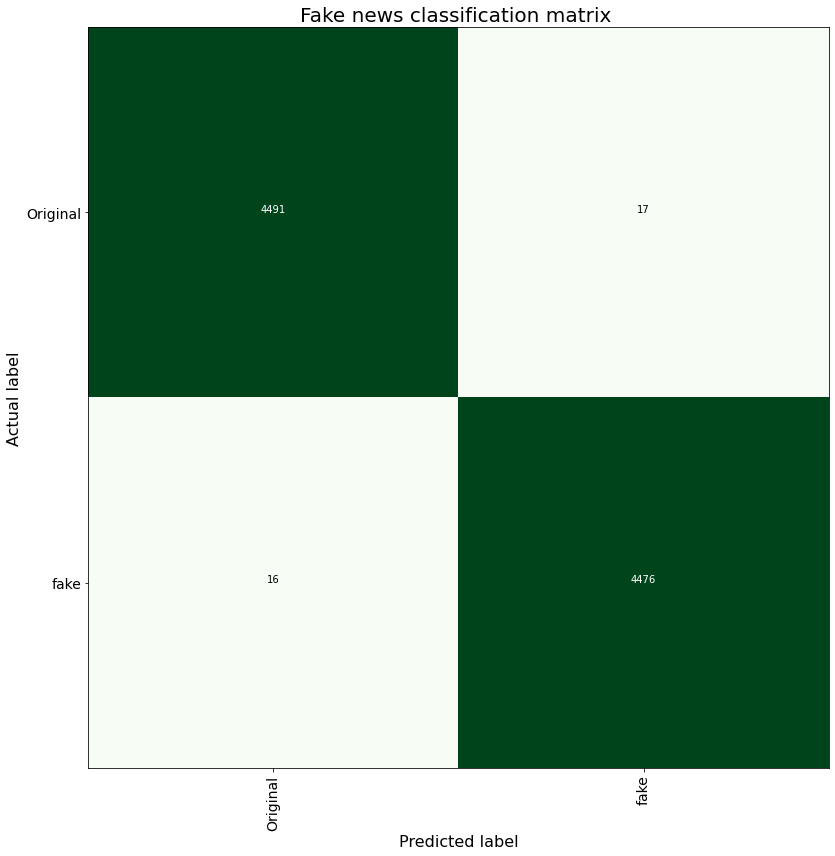

In [48]:
plt.figure(figsize = (14,12))
plot_confusion_matrix(cm, classes=names,
                      title='Fake news classification matrix ')

In [49]:
from sklearn.metrics import roc_curve , roc_auc_score

In [52]:
y_pred = model_1.predict_proba(test_pad)

fpr , tpr , threshold = roc_curve(y_test , y_pred)
#print(fpr)
#print(tpr)
print(threshold)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[1.9999868e+00 9.9998677e-01 9.9982113e-01 9.9981886e-01 9.9978274e-01
 9.9977392e-01 9.9963164e-01 9.9962711e-01 9.9959725e-01 9.9959403e-01
 9.9926013e-01 9.9924976e-01 9.9863487e-01 9.9861789e-01 9.9799466e-01
 9.9791425e-01 9.9687684e-01 9.9686676e-01 9.9657166e-01 9.9656481e-01
 9.9653757e-01 9.9614173e-01 9.9612516e-01 9.9553728e-01 9.9552864e-01
 9.9539798e-01 9.9532866e-01 9.9525321e-01 9.9521434e-01 9.9498498e-01
 9.9481636e-01 9.9443662e-01 9.9440306e-01 9.9225777e-01 9.9204773e-01
 9.9001992e-01 9.8971188e-01 9.8735553e-01 9.8681980e-01 9.8612726e-01
 9.8601413e-01 9.8587739e-01 9.8585331e-01 9.7900784e-01 9.7849905e-01
 9.7335148e-01 9.7331065e-01 9.7155344e-01 9.7139490e-01 9.6920657e-01
 9.6909583e-01 9.3814903e-01 9.3808508e-01 9.2917883e-01 9.2707831e-01
 9.2639923e-01 9.2476583e-01 9.2295402e-01 9.2288911e-01 9.1970688e-01
 9.1931289e-01 9.1356373e-01 9.0932375e-01 9.0419883e-01 9.0336740e-01
 8.9093566e-01 8.8588858e-01 8.1773680e-01 8.1054544e-01 8.0725700e-01
 8.000

In [73]:
def plot_roc_auc(fpr , tpr , dddd):
    plt.figure(figsize = (23,9))
    plt.plot(fpr , tpr , c = 'orange' , label = dddd)
    plt.plot([0,1] , [0,1] , c = 'b' , linestyle = '--')
    plt.xlabel('False positive' , size = 16)
    plt.ylabel('True postive' , size = 16)
    plt.title('ROC Curve of News classification' , size = 20)
    plt.legend()
    
    plt.show()

0.9795747711414122


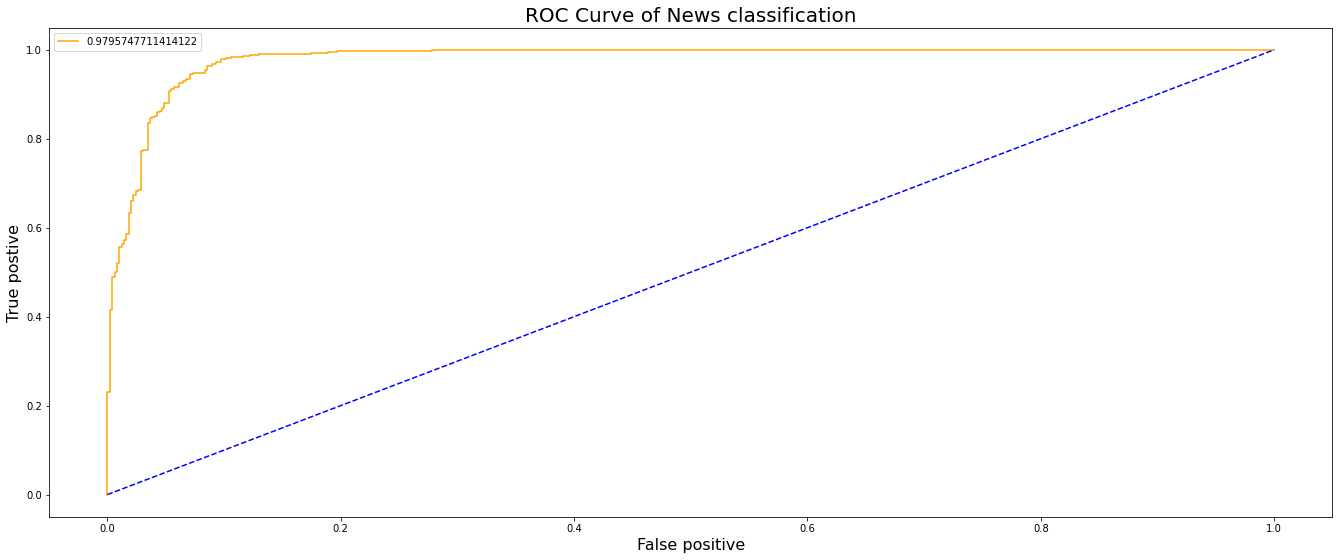

In [74]:
import matplotlib.pyplot as plt
from sklearn import metrics
auc_curve = metrics.auc(fpr , tpr)
print(auc_curve)
plot_roc_auc(fpr , tpr , auc_curve)
    